In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
cancer_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv")

In [16]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,...,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,...,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,...,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,...,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [17]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [18]:
!pip install scikit-learn==0.23.1
!pip install boruta==0.3

In [19]:
corr = cancer_data.corr()
corr.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
avgAnnCount,1.000000,0.923935,0.093793,0.292551,0.907281,-0.153511,0.070595,-0.018056,-0.117826,-0.118879,...,0.217377,-0.184398,-0.110135,-0.134860,0.033512,0.440741,0.207671,-0.095842,-0.028986,-0.130745
avgDeathsPerYear,0.923935,1.000000,0.083217,0.244401,0.971384,-0.078702,0.064497,-0.016642,-0.149103,-0.146657,...,0.176008,-0.143982,-0.041234,-0.190650,0.092127,0.456169,0.213360,-0.161171,-0.070212,-0.074008
incidenceRate,0.093793,0.083217,1.000000,-0.006377,0.046802,0.018940,0.064139,0.015603,-0.001209,0.004629,...,0.149924,0.065979,0.062519,-0.031335,0.118791,0.002370,-0.204575,-0.155923,-0.113258,0.467683
medIncome,0.292551,0.244401,-0.006377,1.000000,0.269641,-0.793994,0.041672,0.000035,-0.089085,-0.150649,...,0.746149,-0.753168,-0.723002,0.174797,-0.268332,0.450907,0.087813,0.448764,-0.005879,-0.433311
popEst2015,0.907281,0.971384,0.046802,0.269641,1.000000,-0.083109,0.059083,-0.013029,-0.187828,-0.191556,...,0.186544,-0.186896,-0.064535,-0.201226,0.086081,0.499890,0.244680,-0.128920,-0.054911,-0.111470


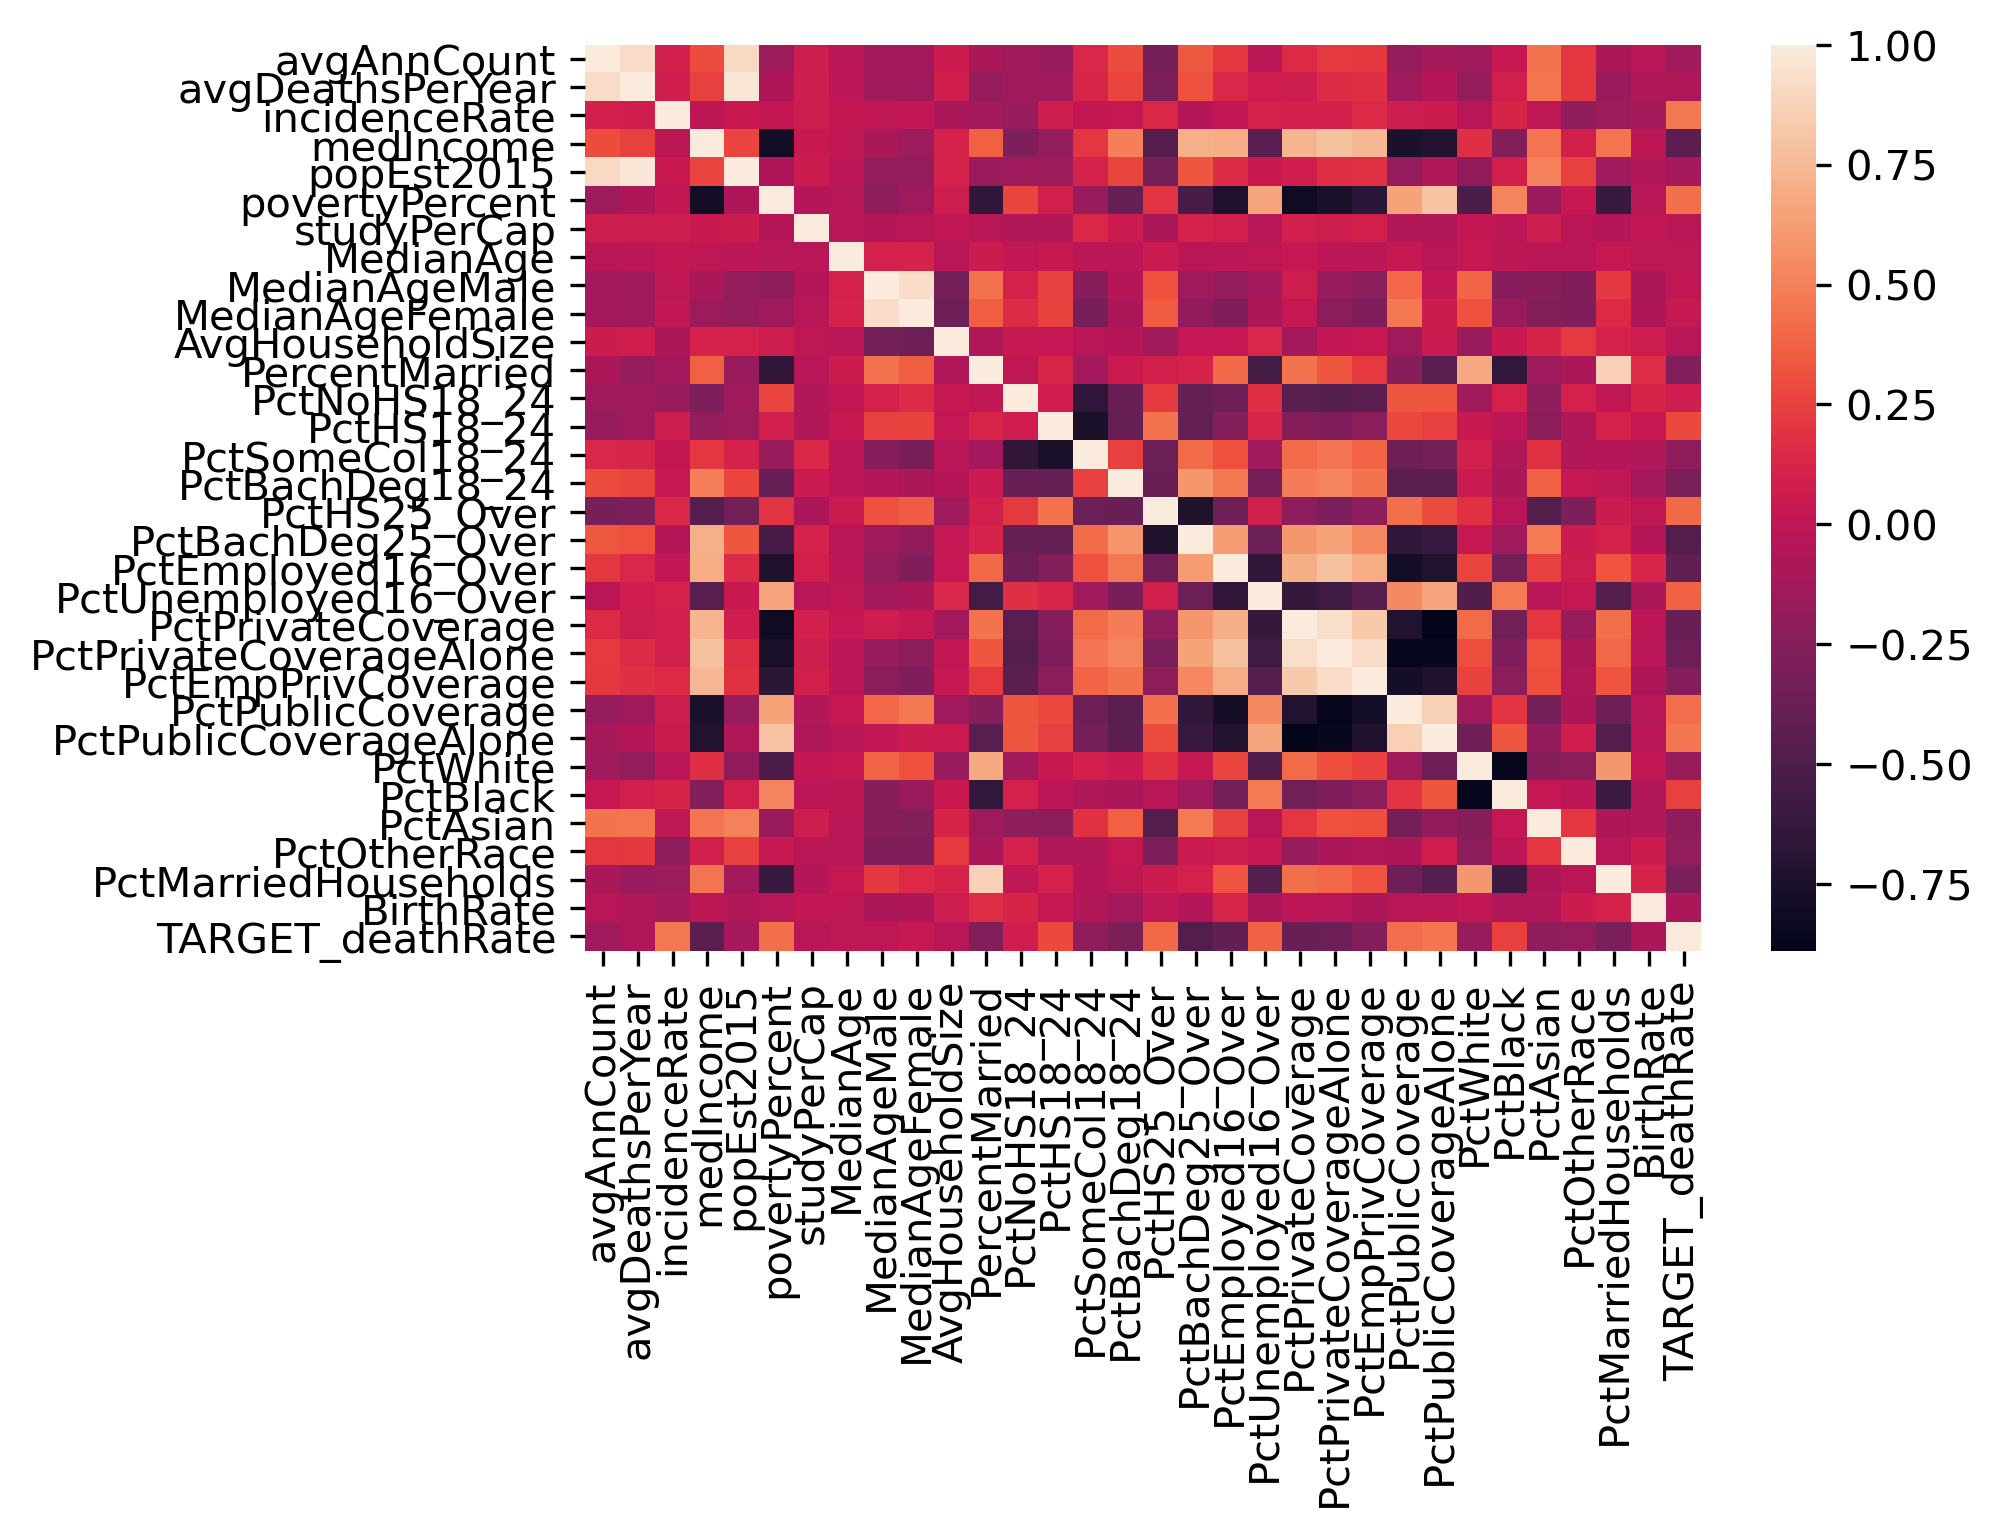

In [26]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values)

In [44]:
cols = list(cancer_data.columns)

In [42]:
cancer_data[cols].duplicated().count()

3051

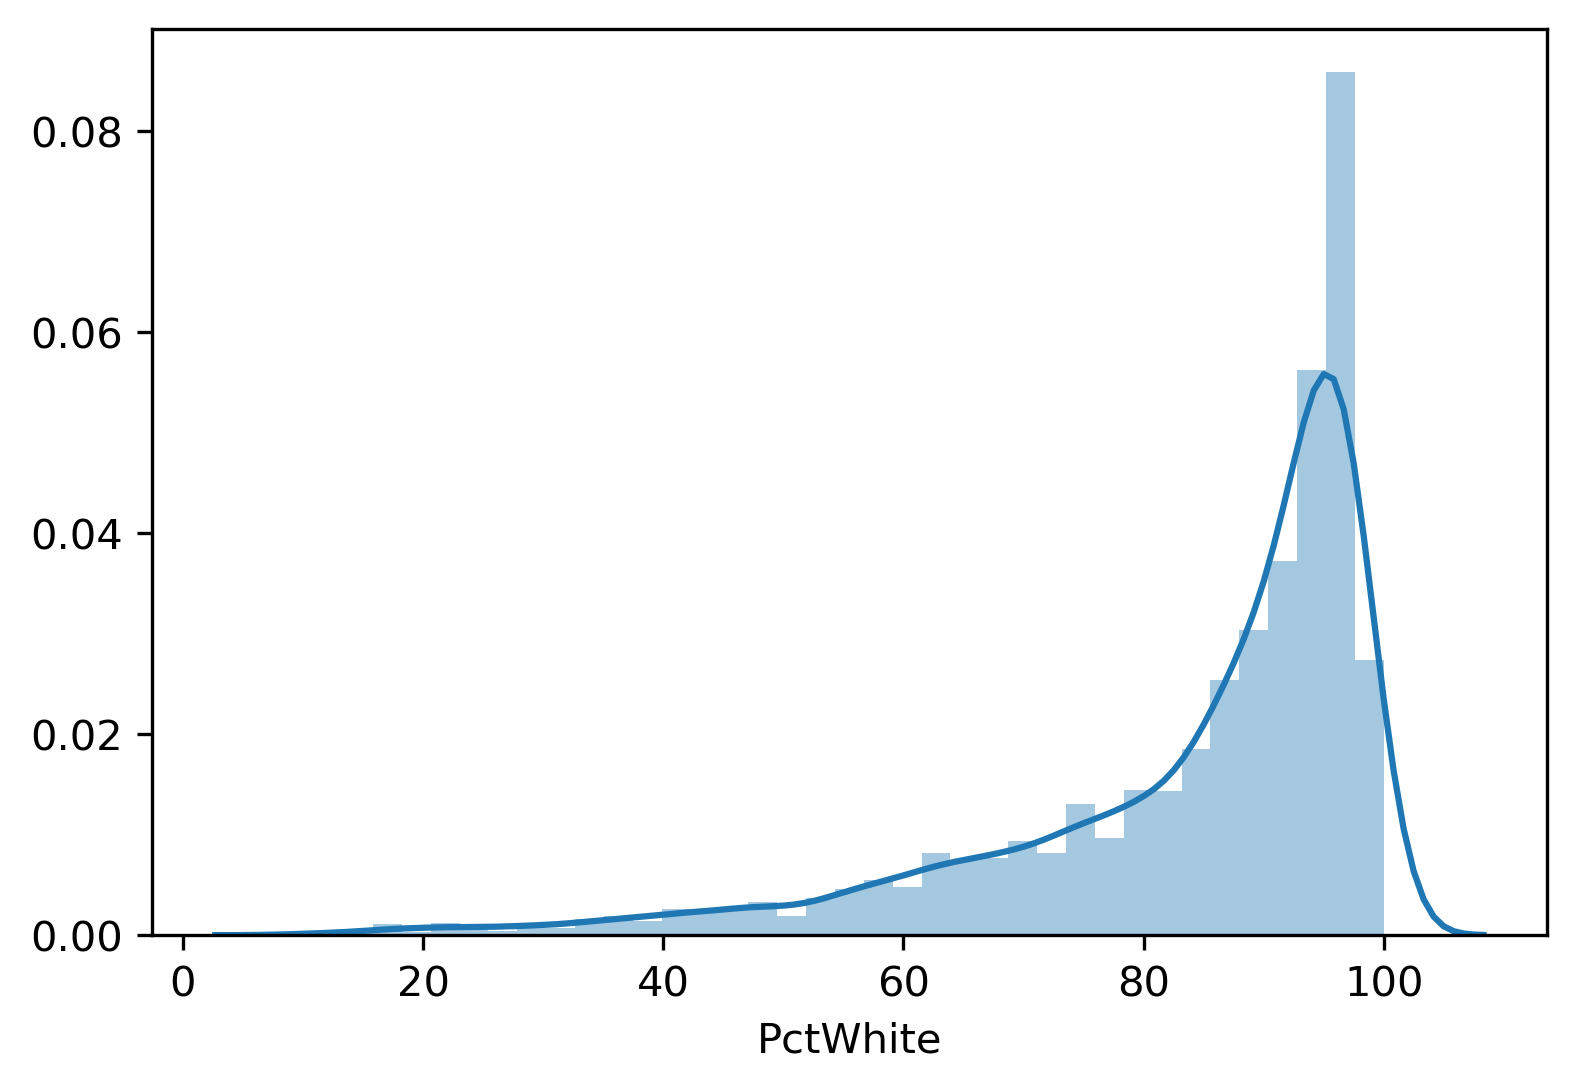

In [48]:
sns.distplot(cancer_data['PctWhite'])
plt.show()

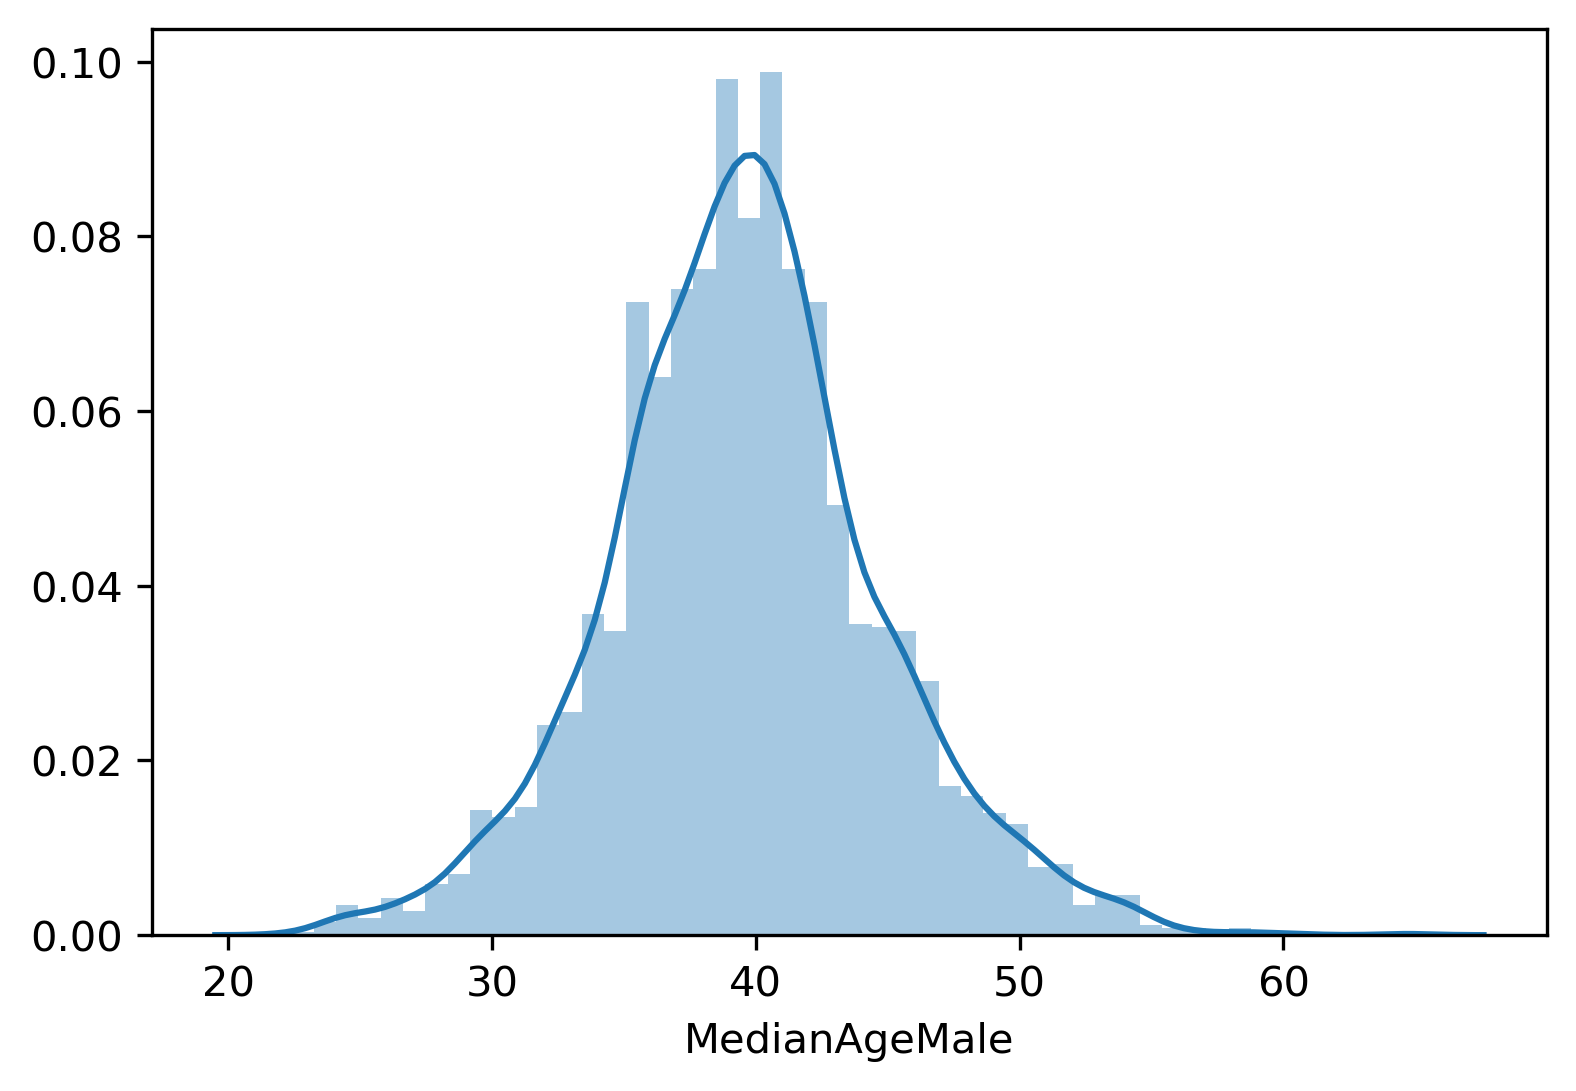

In [49]:
sns.distplot(cancer_data['MedianAgeMale'])
plt.show()

In [53]:
cancer_data[['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']].isnull().any()

PctSomeCol18_24            True
PctEmployed16_Over         True
PctPrivateCoverageAlone    True
dtype: bool

In [54]:
df = cancer_data.drop(['binnedInc', 'Geography', 'PctSomeCol18_24'], axis = 1)

In [56]:
df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,48.4,49.6,46.4,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,41.9,41.3,43.2,...,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,48.9,47.9,49.9,...,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,44.2,42.7,45.2,...,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,45.0,42.2,48.0,...,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [57]:
df[df.columns].isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over         152
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    604
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
TARGET_deathRate             0
dtype: int64

In [60]:
df['PctEmployed16_Over'] = df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].mean())

In [61]:
df['PctPrivateCoverageAlone'] = df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].mean())

In [62]:
df[df.columns].isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

In [63]:
X = df.drop('TARGET_deathRate', axis = 1)
y = df['TARGET_deathRate']

print(X.shape)
print(y.shape)

(3051, 30)
(3051,)


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [92]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2745, 30) (306, 30) (2745,) (306,)


In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(X_train,y_train)
reg

LinearRegression()

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [101]:
reg.score(X_train, y_train)

0.5346091721578619

In [103]:
y_pred = reg.predict(X_test)

In [105]:
mean_squared_error(y_test, y_pred)      #mse of test data

335.27549810087584

In [109]:
rmse = np.sqrt(np.mean((y_test-y_pred)**2))     #rmse of test data    
rmse

18.310529705633197

In [118]:
x_pred = reg.predict(X_train)          #mae of training data

In [119]:
mean_absolute_error(y_train,x_pred)

13.869292064611182

In [120]:
np.sqrt(np.mean((y_train-x_pred)**2))        #rmse of training data

18.870896851653644

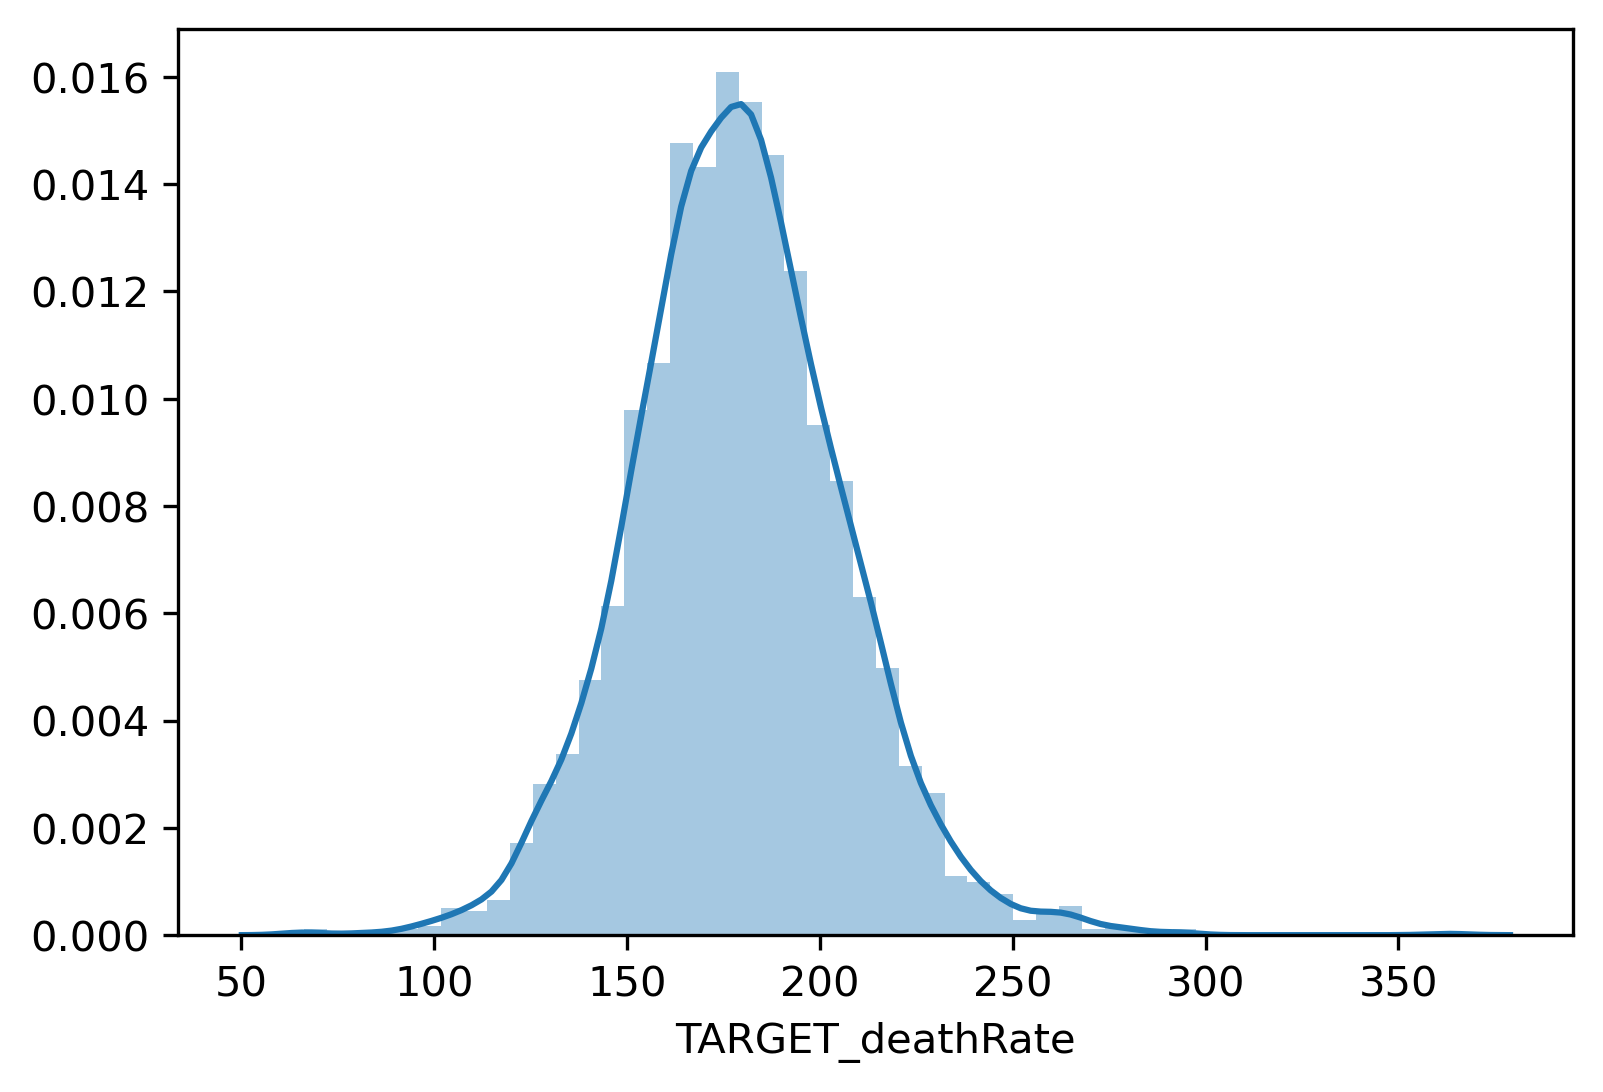

In [125]:
sns.distplot(y)

In [ ]:
#random forest modelling

In [127]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state = 1)

In [128]:
model1.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [129]:
model2 = RandomForestRegressor(random_state = 1, max_depth = 5)
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=1)

In [130]:
model3 = RandomForestRegressor(random_state = 2)
model3.fit(X_train, y_train)

RandomForestRegressor(random_state=2)

In [131]:
x1_pred = model1.predict(X_train)

In [167]:
mse1 = mean_squared_error(y_train,x1_pred)

In [168]:
x2_pred = model2.predict(X_train)

In [169]:
mse2 = mean_squared_error(y_train,x2_pred)

In [170]:
x3_pred = model3.predict(X_train)

In [171]:
mse3 = mean_squared_error(y_train, x3_pred)

In [172]:
print
(mse1,mse2,mse3)

(30.456188316939834, 277.30891272145334, 30.712439914754036)

In [173]:
test_pred1 = model1.predict(X_test)
test_pred2 = model2.predict(X_test)
test_pred3 = model3.predict(X_test)

In [174]:
test1_mse = mean_squared_error(y_test, test_pred1)
test2_mse = mean_squared_error(y_test, test_pred2)
test3_mse = mean_squared_error(y_test, test_pred3)

In [175]:
print(test1_mse, test2_mse, test3_mse)

181.5637977222222 330.5313377434116 189.14626817647053


In [176]:
#decision tree modelling
from sklearn.tree import DecisionTreeRegressor

In [177]:
Dt1 = DecisionTreeRegressor(random_state = 1, max_depth = 5)
model_1 = Dt1.fit(X_train,y_train)
model_1

DecisionTreeRegressor(max_depth=5, random_state=1)

In [178]:
x_1_pred = model_1.predict(X_test)

In [179]:
Dt2 = DecisionTreeRegressor(random_state = 1, max_depth = 10)
model_2 = Dt2.fit(X_train,y_train)
model_2

DecisionTreeRegressor(max_depth=10, random_state=1)

In [180]:
x_2_pred = model_2.predict(X_test)

In [181]:
Dt3 = DecisionTreeRegressor(random_state = 1, max_depth = 15)
model_3 = Dt3.fit(X_train,y_train)
model_3

DecisionTreeRegressor(max_depth=15, random_state=1)

In [182]:
x_3_pred = model_3.predict(X_test)

In [183]:
rmse1 = np.sqrt(np.mean((x_1_pred-y_test)**2))
rmse2 = np.sqrt(np.mean((x_2_pred-y_test)**2))
rmse3 = np.sqrt(np.mean((x_3_pred-y_test)**2))

In [184]:
print(rmse1, rmse2, rmse3)

22.278187283146135 18.589951258457056 21.02686037063875


In [185]:
#cross validation
from sklearn.model_selection import GridSearchCV

In [195]:

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [196]:
rf = RandomForestRegressor(random_state = 1)
parameters = {'bootstrap': [True],'max_depth': [10, 20],'min_samples_leaf': [3, 4],'min_samples_split': [4, 6],'n_estimators': [100, 200]}

CV = GridSearchCV(rf, parameters, cv = 3, n_jobs = -1, verbose = 2)
CV.fit(X_train,y_train)

print_results(CV)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   27.3s finished


BEST PARAMS: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}

0.622 (+/-0.013) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.625 (+/-0.011) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
0.622 (+/-0.013) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}
0.625 (+/-0.011) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 200}
0.617 (+/-0.011) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
0.619 (+/-0.012) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
0.617 (+/-0.011) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}

In [214]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2745, 30) (2745,) (306, 30) (306,)


In [215]:
trained = CV.predict(X_train)

In [217]:
tested = CV.predict(X_test)

In [219]:
mse_trained = mean_squared_error(trained, y_train)
mse_tested = mean_squared_error(tested, y_test)
print(mse_trained, mse_tested)

58.96406113311565 191.83957221870514


In [220]:
rmse1 = np.sqrt(np.mean((trained - y_train)**2))
rmse2 = np.sqrt(np.mean((tested - y_test)**2))
print(rmse1, rmse2)

7.678805970534451 13.850616311872376


In [235]:
r_f = RandomForestRegressor(random_state = 1)
r_f.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [244]:
from boruta import BorutaPy
feat_selector = BorutaPy(r_f, n_estimators='auto', verbose=2, random_state=1)


In [246]:
feat_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	23
Tentative: 	7
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	23
Tentative: 	6
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
I

BorutaPy(estimator=RandomForestRegressor(n_estimators=74,
                                         random_state=RandomState(MT19937) at 0x1E14E8B5440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1E14E8B5440, verbose=2)

In [249]:
print('selected_features: ', feat_selector.support_)

selected_features:  [ True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True]


In [250]:
print('ranking of feature: ', feat_selector.ranking_)

ranking of feature:  [1 1 1 1 1 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]


In [251]:
print('no. of important features: ', feat_selector.n_features_)

no. of important features:  27


In [255]:
selected_rf_features = pd.DataFrame({'features' : list(X_train.columns) , 'ranking' : feat_selector.ranking_})

In [258]:
selected_rf_features.sort_values(by ='ranking')

,features,ranking
0,avgAnnCount,1
27,PctOtherRace,1
26,PctAsian,1
25,PctBlack,1
24,PctWhite,1
23,PctPublicCoverageAlone,1
22,PctPublicCoverage,1
21,PctEmpPrivCoverage,1
19,PctPrivateCoverage,1
18,PctUnemployed16_Over,1


In [259]:
x_important_train = feat_selector.transform(np.array(X_train))
x_important_test = feat_selector.transform(np.array(X_test))

In [261]:
rf_important = RandomForestRegressor(random_state=1, n_estimators=1000, n_jobs = -1)
rf_important.fit(x_important_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [262]:
test_pred = rf_important.predict(x_important_test)

In [264]:
print(mean_squared_error(y_test, test_pred))

185.5000439311122
